In [1]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re
from re import split

In [2]:
def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]
mlen = 3 # number states
tlen = 3 # # ways to count time
excludedvids=[]
plas_old = 1/0.39
glas_old = 1/2.1

In [3]:
def parser_arr_old(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'Processing' in line:
                vidnum = line.split('pp_')[-1]
                vidnum = vidnum.split('.avi')[0]
                vidnum = vidnum.split('_')[0]
                vidnum = int(vidnum)
                #print(vidnum)
                line = textfile.readline()
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word))
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word))
                        except ValueError:
                            pass
                        
                
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        vidnums=[]
                        vidarrs.append([[], vidnums])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                    else:
                        pass    
                    
                    line = textfile.readline()
                    #print('array lives here', line)
                    if '[[' in line:
                        arr = np.zeros((mlen,mlen))
                        #print(arr)
                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[0,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[1,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[2,:] = linenums

                        transitions[-1] += arr
                        vidarrs[-1][0].append(arr)
                        vidarrs[-1][1].append(vidnum)
                        #print(arr,'\n', transitions[-1])
                    else:
                        print("missing array")
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([transitions, np.array(thresholds), vidarrs]) 




        
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
    
def col_norm(array):
    cols = array.T
    cols = np.array([ratio(j)*100 for j in cols])
    return cols.T
def row_norm(array):
    rows = np.array([ratio(i)*100 for i in array])
    return rows

In [4]:

cols = [ 'mediumslateblue','fuchsia','darkviolet' ] #p, g, b


len indices 12
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[[4. 0. 6.]
 [0. 0. 0.]
 [5. 0. 8.]] counts [39.23076923  0.         60.76923077]
[[ 5.  0.  3.]
 [ 0.  0.  0.]
 [ 3.  0. 10.]] counts [42.78846154  0.         57.21153846]
[[3. 0. 3.]
 [0. 0. 2.]
 [3. 2. 9.]] counts [23.80952381  4.76190476 71.42857143]
[[3. 0. 3.]
 [0. 0. 0.]
 [4. 0. 8.]] counts [41.66666667  0.         58.33333333]
[[0. 0. 1.]
 [0. 0. 0.]
 [1. 0. 5.]] counts [ 8.33333333  0.         91.66666667]
[[2. 0. 1.]
 [0. 0. 0.]
 [0. 0. 5.]] counts [33.33333333  0.         66.66666667]
[[5. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] counts [100.   0.   0.]
[[ 2.  0.  5.]
 [ 1.  1.  1.]
 [ 4.  2. 10.]] counts [28.96825397 15.27777778 55.75396825]
[[ 8.  0. 17.]
 [ 0.  0.  1.]
 [17.  1. 20.]] counts [25.57894737  0.87719298 73.54385965]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 5.]] counts [  0.   0. 100.]
[[ 5.  0.  3.]
 [ 0.  0.  0.]
 [ 3.  0. 12.]] counts [41.25  0.   58.75]
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1. 16.]] 

Text(0, 0.5, 'observed probability of transition')

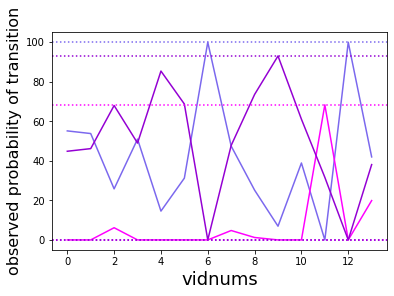

In [5]:
#broad observations array
trans_runs= parser_arr_old(glob('./output wash*halftrimmeddebugg.txt')[0])

    
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
        print(vidnums)
        inds=np.argsort(vidnums)
        #print(inds)
        vidarrs = vidarrs[inds]
        #print(row_norm(vidarrs))
        #vidarrs = np.cumsum(vidarrs, axis=0)
        vidnums = list(range(len(vidarrs)))
        #print(vidnums)
        for vidnum in vidnums: 
            T_obb = vidarrs[vidnum]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            print(T_obb, 'counts', counts)
            #print('counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])
        print('Total transitions: ',np.sum(vidarrs), np.sum(vidarrs, axis=0), '\n')
#print(t_threshes,c_threshes)    

# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=0))
y_values_selected = col_norm(y_values_selected)
print('\nsummed y values\n', y_values_selected, '\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2,y3 = y_values_selected 
print('\nvidnums',vidnums,y1,y2,y3)
vidnums = list(range(len(y1)))
fig,ax = plt.subplots()
print('\n',len(vidnums), len(y1))        
plt.plot(vidnums, y1, c = cols[0], ls = '-')
plt.plot(vidnums, y2, c = cols[1], ls = '-')
plt.plot(vidnums, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('vidnums', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

[20.0, 30.0, 40.0] [39.887441330671614, 41.5576843943018, 45.437671978594594] [5.295410198343638, 6.501576917730448, 9.71742223825557] [54.81714847098475, 51.94073868796776, 44.84490578314983]
3 3


Text(0, 0.5, 'observed probability of transition')

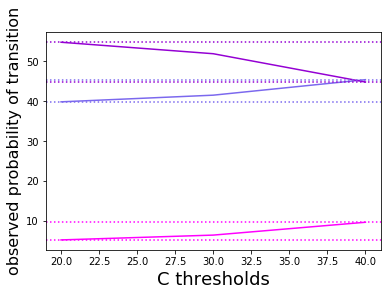

In [6]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
    #print(vidnums)
    inds=np.argsort(vidnums)
    #print(inds)
    vidarrs = vidarrs[inds]
    #print(vidarrs)
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        x3.append(counts[2])
    if len(x1) == len(vidnums):
        #vidarrs = np.cumsum(vidarrs, axis=0)
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby c threshold
stored_y_values = np.array(stored_y_values)
cs = list(set(c_threshes))
list.sort(cs)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
y3 = []
for j in cs:
    inds = np.where(np.array(c_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    y3.append(collected_value_across_all_vids[2])
print(cs,y1,y2,y3)
fig,ax = plt.subplots()
print(len(cs), len(y1))        
plt.plot(cs, y1, c = cols[0], ls = '-')
plt.plot(cs, y2, c = cols[1], ls = '-')
plt.plot(cs, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('C thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

[35.0, 48.333333333333336, 61.66666666666667, 75.0] [41.299304313140986, 42.10692258002978, 42.95953682687399, 42.81129988471258] [7.814626500372729, 7.763067745518485, 6.447397121316115, 6.660787771898883] [50.886069186486274, 50.130009674451735, 50.593066051809885, 50.52791234338853]
4 4


Text(0, 0.5, 'observed probability of transition')

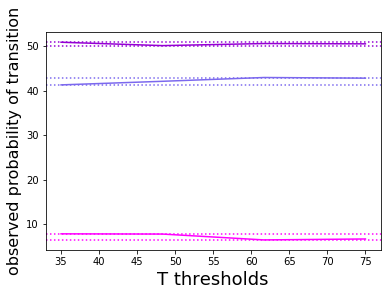

In [7]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
    #print(vidnums)
    inds=np.argsort(vidnums)
    #print(inds)
    vidarrs = vidarrs[inds]
    #print(vidarrs)
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        x3.append(counts[2])
    if len(x1) == len(vidnums):
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby t threshold
stored_y_values = np.array(stored_y_values)
ts = list(set(t_threshes))
list.sort(ts)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
y3 = []
for j in ts:
    inds = np.where(np.array(t_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    y3.append(collected_value_across_all_vids[2])
print(ts,y1,y2,y3)
fig,ax = plt.subplots()
print(len(ts), len(y1))        
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('T thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video


len indices 12
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
criteria ['35,20', '35,30', '35,40', '48,20', '48,30', '48,40', '61,20', '61,30', '61,40', '75,20', '75,30', '75,40']

stored_y_values [[[39.23076923076923, 42.78846153846154, 23.80952380952381, 41.66666666666667, 8.333333333333332, 33.33333333333333, 100.0, 28.96

Text(0, 0.5, 'observed probability of transition')

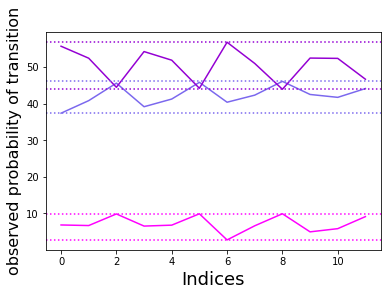

In [8]:
index = list(range(len(trans_runs[0])))
def row_norm(array):
    rows = np.array([ratio(j)*100 for j in array])
    return rows
criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
        print(vidnums)
        inds=np.argsort(vidnums)
        #print(inds)
        vidarrs = vidarrs[inds]
        #print(vidarrs)
        #vidarrs = np.cumsum(vidarrs, axis=0)
        vidnums = list(range(len(vidarrs)))
        #print(vidnums)
        for vidnum in vidnums: 
            T_obb = vidarrs[vidnum]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            #print('counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])#,x3])
#print(t_threshes,c_threshes)    
print('criteria', criteria)
# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=2))
print(y_values_selected)
y_values_selected = row_norm(y_values_selected)
print('\n','\nsummed y values\n', y_values_selected, y_values_selected.T,'\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2,y3 = y_values_selected.T 

fig,ax = plt.subplots()
print(len(criteria), len(y1))   
ts = list(range(len(y1)))
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('Indices', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)


In [9]:
v1 = y1
v2 = y2
v3=y3

In [10]:
x = np.array([[  0.   ,        0.    ,       0.    ,      36.77828063 ,341.91849817,
 251.16042973, 100.    ,     129.81834646, 247.66580148 ,  0.,
   1.30671201], [  0. ,          0.      ,     0.     ,      7.76398098 ,  0.,
   1.7259552  ,  0.   ,        0.   ,      158.35761075  , 0.,
  63.60027952], [900. ,        900.     ,    900.      ,   855.45773839, 558.08150183,
 647.11361507 ,800.   ,      770.18165354 ,493.97658777 ,  0.,
 835.09300846]])
print(x,'\n', x.T, (x.T).T*100)

[[  0.           0.           0.          36.77828063 341.91849817
  251.16042973 100.         129.81834646 247.66580148   0.
    1.30671201]
 [  0.           0.           0.           7.76398098   0.
    1.7259552    0.           0.         158.35761075   0.
   63.60027952]
 [900.         900.         900.         855.45773839 558.08150183
  647.11361507 800.         770.18165354 493.97658777   0.
  835.09300846]] 
 [[  0.           0.         900.        ]
 [  0.           0.         900.        ]
 [  0.           0.         900.        ]
 [ 36.77828063   7.76398098 855.45773839]
 [341.91849817   0.         558.08150183]
 [251.16042973   1.7259552  647.11361507]
 [100.           0.         800.        ]
 [129.81834646   0.         770.18165354]
 [247.66580148 158.35761075 493.97658777]
 [  0.           0.           0.        ]
 [  1.30671201  63.60027952 835.09300846]] [[    0.           0.           0.        3677.828063 34191.849817
  25116.042973 10000.       12981.834646 24766.58

5 5


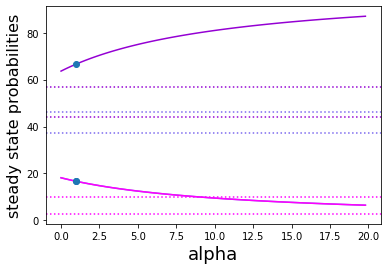

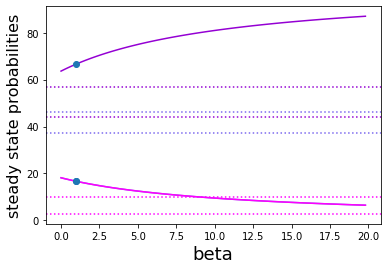

In [11]:
"tESTING HYPOTHESIS WITH all 2 positions for particle to swing to"
alphas = np.linspace(0, 20, 100,endpoint =False)#glass
betas = np.linspace(0, 20, 100,endpoint =False)#plastic
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        T_expected_narrow = np.asarray([[0, 0, 4*(i+1)],
         [0, 0, 4*(j+1)],
                                       [2, 2, 2+i+j]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

5 5


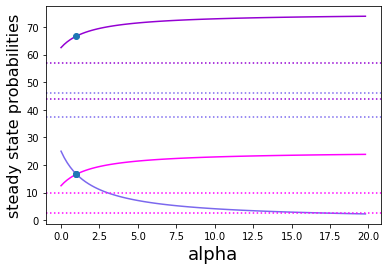

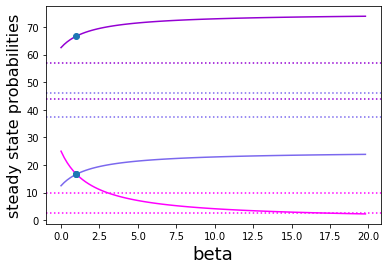

In [12]:
"tESTING HYPOTHESIS WITH all position, early state important, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 20, 100,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        T_expected_narrow = np.asarray([[0, 0, 2*(i+1)],
         [0, 0, 2*(j+1)],
                                       [2/(i+1), 2/(1+j), 2]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


5 5


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


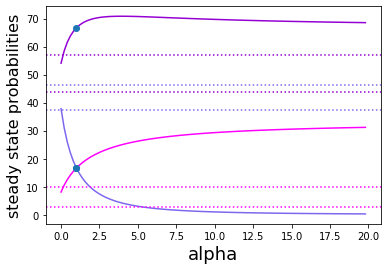

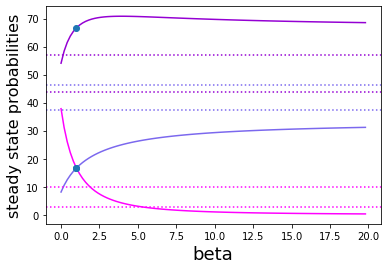

In [13]:
"tESTING HYPOTHESIS WITH all position, ba"
#narrow observations array
alphas = np.linspace(0, 20, 100,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        p = (j*2/(18*(1+i+j)*(3+i))+
             4*2*(j+1)/(18*2*(3+i)*(1+i+j)*(2+i+j)))
        g = (i*2/(18*(1+i+j)*(3+j))+
             4*2*(i+1)/(18*2*(3+j)*(1+i+j)*(2+i+j)))
        m = (2*j*(i+1)/(18*(3+i)*(1+j+i))+
              8*(i+1)*(j+1)/(18*2*(3+j)*(i+j+1)*(i+j+2))+
              8*(j+1)*(i+1)/(18*2*(3+i)*(i+j+1)*(i+j+2))+
              i*2*(1+j)/(18*(3+j)*(1+i+j)))

        T_expected_narrow = np.asarray([[p, g, m],
                                        [p, g, m],
         [p, g, m]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

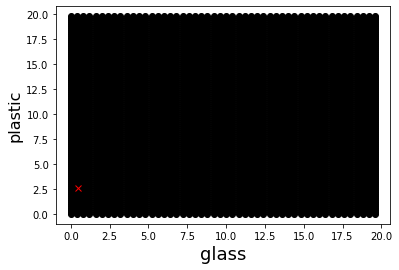

In [14]:
def mean(li):
    return(sum(li) / len(li))
def rang(li):
    return(abs(max(li)-min(li)))

alphas = np.linspace(0,20, 50,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
tolerances = [ mean(v1),mean(v2),mean(v3)]
tols = [ rang(v1),rang(v2),rang(v3)]
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        
        T_expected_narrow = np.asarray([[0, 0, 2*(i+1)],
         [0, 0, 2*(j+1)],
                                       [2/(i+1), 2/(1+j), 2]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        test = all(math.isclose(evec_one[i], tolerances[i], abs_tol = tols[i])  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(i,j, c=col, marker='o')
        plt.xlabel('glass', fontsize=18)
        plt.ylabel('plastic', fontsize=16)
        
plt.plot(glas_old, plas_old, marker='x', c='r')


[8.697923212960802, 7.152918464494819, 12.854594320111566]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part


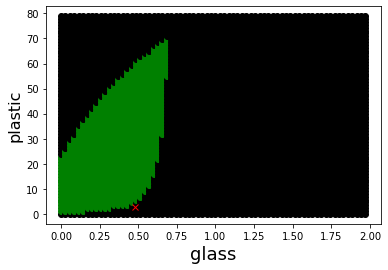

In [15]:


def mean(li):
    return(sum(li) / len(li))
def rang(li):
    return(abs(max(li)-min(li)))

alphas = np.linspace(0,2, 70,endpoint =False)
betas = np.linspace(0, 80, 70,endpoint =False)
x1 = []
x2 = []
x3 = []
tolerances = [ mean(v1),mean(v2),mean(v3)]
tols = [ rang(v1),rang(v2),rang(v3)]
print(tols)
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        
        p = (j*2/(18*(1+i+j)*(3+i))+
             4*2*(j+1)/(18*2*(3+i)*(1+i+j)*(2+i+j)))
        g = (i*2/(18*(1+i+j)*(3+j))+
             4*2*(i+1)/(18*2*(3+j)*(1+i+j)*(2+i+j)))
        m = (2*j*(i+1)/(18*(3+i)*(1+j+i))+
              8*(i+1)*(j+1)/(18*2*(3+j)*(i+j+1)*(i+j+2))+
              8*(j+1)*(i+1)/(18*2*(3+i)*(i+j+1)*(i+j+2))+
              i*2*(1+j)/(18*(3+j)*(1+i+j)))

        T_expected_narrow = np.asarray([[p, g, m],
                                        [p, g, m],
         [p, g, m]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        test = all(math.isclose(evec_one[i], tolerances[i], abs_tol = tols[i])  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(i,j, c=col, marker='o')
        plt.xlabel('glass', fontsize=18)
        plt.ylabel('plastic', fontsize=16)
plt.plot(glas_old, plas_old, marker='x', c='r')


In [16]:
def parser_arr(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    timestotrans = []
    statelists = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'Processing' in line:
                vidnum = line.split('pp_')[-1]
                vidnum = vidnum.split('.avi')[0]
                vidnum = vidnum.split('_')[0]
                #print(vidnum)
                vidnum = int(vidnum)
                line = textfile.readline()
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word)) #collect T_treshold
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word)) # colect C_threshold
                        except ValueError:
                            pass
                                          
                    #Initialise collecction arrays for this threshold pair
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        #vidnums=[]
                        vidarrs.append([[] for i in range(3)])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                        timestotrans.append(np.zeros((tlen,mlen,mlen)))
                        statelists.append([])
                    else:
                        pass    
                    
                    # Collect transition data
                    line = textfile.readline()
                    #print('array lives here', line)
                    trarr = read_square_arr(line, textfile)
                    transitions[-1] += trarr
                    vidarrs[-1][0].append(trarr)
                    vidarrs[-1][1].append(vidnum)
        
                    # Collect time data
                    #print(len(timestotrans[-1]))
                    tiarrs = []
                    for times in timestotrans[-1]:
                        line = textfile.readline()
                        #print('array lives there', line)
                        tiarr = read_square_arr(line, textfile) 
                        #print(arr)
                        times += tiarr   
                        #print(times)
                        tiarrs.append(tiarr)
                        line = textfile.readline()
                        #print(arr,'\n', transitions[-1])
                    vidarrs[-1][2].append(tiarrs)                       
                    # Collect state data 
                    statelists[-1].append([float(f) for f in filter(int_from_text, split(' |\[|]', line))])
                    #print(thresholds[-1])
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([np.array(transitions), np.array(thresholds), np.array(vidarrs), np.array(timestotrans), statelists]) 

def int_from_text(text):
    try:
        float(text)
        return True
    except:
        return False
        

def read_square_arr(line, textfile):
    if '[[' in line:
        arr = np.zeros((mlen,mlen))
        #print(split(' |\[|]', line))
        linenums = [float(f) for f in filter(int_from_text, split(' |\[|]', line))]
        #print(linenums)
        arr[0,:] = linenums

        line = textfile.readline()
        #print('array lives here', line)           
        linenums = [float(f) for f in filter(int_from_text, split(' |\[|]', line))]
        #print(linenums)
        arr[1,:] = linenums

        line = textfile.readline()
        #print('array lives here', line) 
        linenums = [float(f) for f in filter(int_from_text, split(' |\[|]', line))]
        #print(linenums)
        arr[2,:] = linenums

        return(arr)
        #print(arr,'\n', transitions[-1])
    else:
        print("missing array")

In [18]:
parser_arr(glob('./output wash*halftrimmeddebugg_regime.txt')[0])

[array([[[ 42.,   0.,  46.],
         [  1.,   4.,   6.],
         [ 44.,   7., 109.]],
 
        [[ 43.,   1.,  33.],
         [  1.,   4.,   4.],
         [ 33.,   4.,  94.]],
 
        [[ 55.,   1.,  24.],
         [  1.,   4.,   4.],
         [ 24.,   4.,  77.]],
 
        [[ 33.,   0.,  46.],
         [  1.,   3.,   6.],
         [ 44.,   7.,  65.]],
 
        [[ 32.,   1.,  33.],
         [  1.,   3.,   4.],
         [ 33.,   4.,  66.]],
 
        [[ 40.,   1.,  24.],
         [  1.,   4.,   4.],
         [ 24.,   4.,  56.]],
 
        [[ 30.,   0.,  46.],
         [  1.,   0.,   6.],
         [ 44.,   7.,  51.]],
 
        [[ 16.,   0.,  23.],
         [  1.,   2.,   3.],
         [ 22.,   4.,  38.]]]), array([[35.        , 20.        ],
        [35.        , 30.        ],
        [35.        , 40.        ],
        [48.33333333, 20.        ],
        [48.33333333, 30.        ],
        [48.33333333, 40.        ],
        [61.66666667, 20.        ],
        [61.66666667, 30.    


len indices 8
[101, 111, 131, 121, 71, 72, 8, 141, 21, 22, 31, 32, 33, 4]
Transitions, times matrices [array([[5., 0., 2.],
       [0., 0., 0.],
       [2., 0., 2.]]), array([[7., 0., 2.],
       [0., 0., 0.],
       [2., 0., 5.]]), array([[ 3.,  1.,  2.],
       [ 0.,  0.,  1.],
       [ 3.,  0., 11.]]), array([[6., 0., 2.],
       [0., 0., 0.],
       [3., 0., 6.]]), array([[0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 2.]]), array([[2., 0., 1.],
       [0., 0., 0.],
       [0., 0., 5.]]), array([[5., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), array([[3., 0., 3.],
       [1., 0., 0.],
       [2., 1., 6.]]), array([[ 9.,  0.,  7.],
       [ 0.,  0.,  1.],
       [ 7.,  1., 19.]]), array([[2., 0., 1.],
       [0., 0., 0.],
       [0., 0., 7.]]), array([[ 3.,  0.,  3.],
       [ 0.,  0.,  0.],
       [ 3.,  0., 13.]]), array([[0., 0., 0.],
       [0., 2., 0.],
       [0., 1., 0.]]), array([[6., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), array([[4., 0., 0.],
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


 


Times (14, 3, 3)


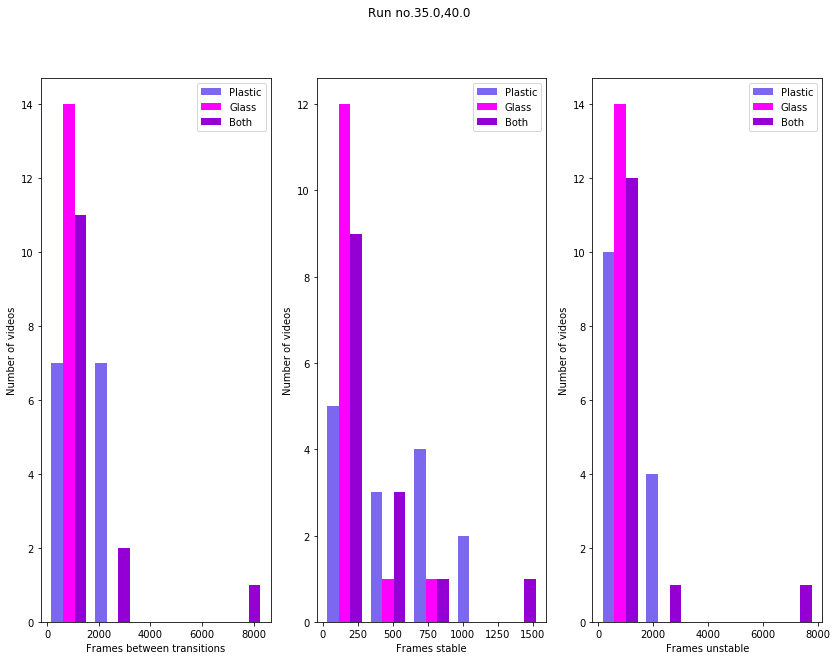

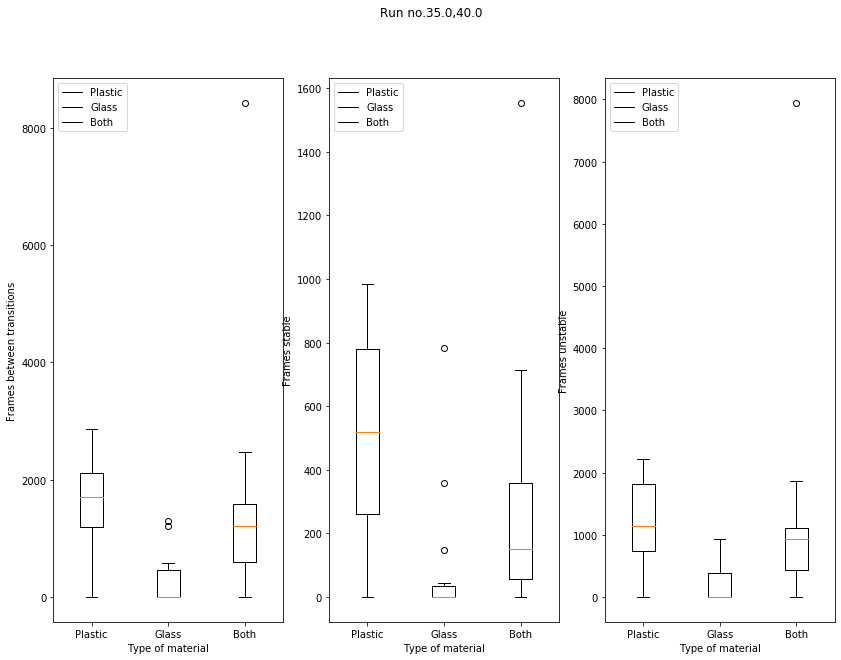

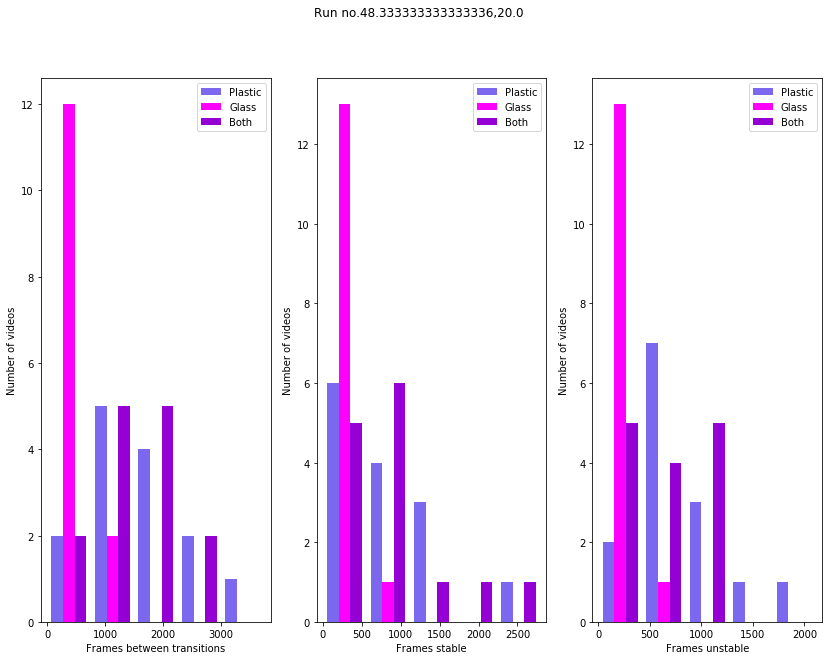

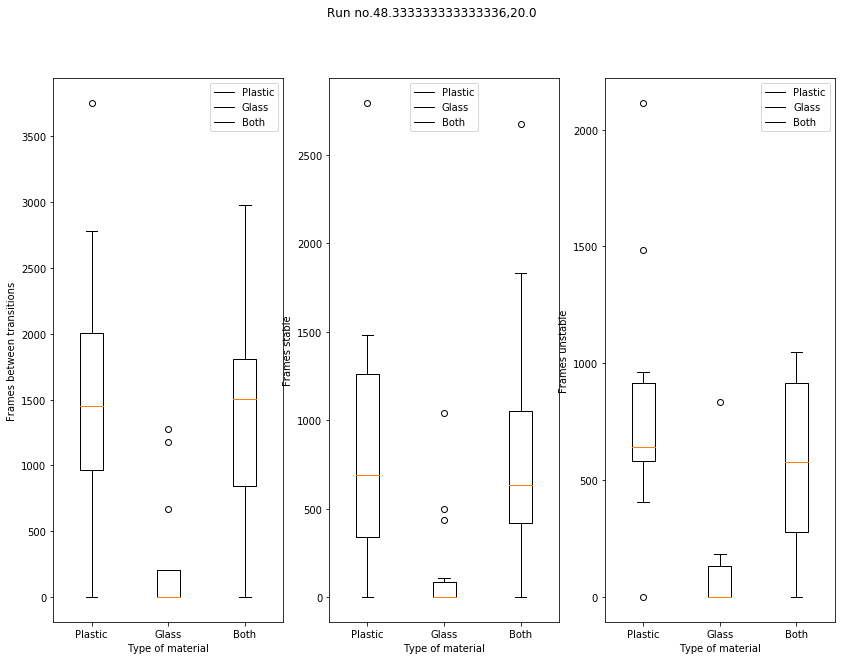

In [19]:
# GEt regime of transitions
#parser_arr(glob('./timestotrans.txt')[0])
trans_runs= parser_arr(glob('./output wash*halftrimmeddebugg_regime.txt')[0])

    
index = list(range(len(trans_runs[0])))

vidnumset = []
print('\nlen indices', len(index))
for i in index[2:4]:
    #xs_tr = []
    #xs_ti = []
    trans_matrices = []
    times_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    #print(np.shape(trans_runs[2]))
    transarrs = np.array(trans_runs[2][i][0])
    timarrs = np.array(trans_runs[2][i][2])
    vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
    print(vidnums)
    inds=np.argsort(vidnums)
    #print(inds)
    transarrs = transarrs[inds]
    timarrs = timarrs[inds]
    #print(row_norm(vidarrs))
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidnums = list(range(len(transarrs)))
    #print(vidnums)
    for vidnum in vidnums: 
        Tr_obb = transarrs[vidnum]
        trans_matrices.append(Tr_obb)
        #print('Transitions ob', Tr_obb)
        Ti_obb = timarrs[vidnum] ##################
        times_matrices.append(Ti_obb)
        #print('Times ob', Ti_obb)
    print("Transitions, times matrices", trans_matrices, times_matrices)
    t_threshes.append(trans_threshes[0])
    c_threshes.append(trans_threshes[1])
    #print('Total transitions: ',np.sum(transarrs), np.sum(transarrs, axis=0), '\n')
    
    transitions2 = trans_matrices
    transitions2 = np.reshape(np.repeat(transitions2, tlen,axis=0), (len(trans_matrices), tlen, mlen, mlen))#timesinstate = np.reshape(np.repeat(timesinstate, tlen,axis=0), (len(statelists), tlen, mlen))
    #print(transitions2)
    #print(len(transitions2))
    #print(np.shape(transitions2))

    timestotrans = times_matrices
    #print(np.shape(timestotrans))
    reduced_timestotrans = timestotrans/transitions2
    #print('red_times', reduced_timestotrans, '\n\n')
    reduced_times_from = np.nansum(reduced_timestotrans, axis=3)# each thresh_set, then each time measure, then each state from
    print('red times from', reduced_times_from, '\n\n')
    
    print("Times", np.shape(reduced_times_from))
    total_time = reduced_times_from[:,0]
    stable_time= reduced_times_from[:,1]
    unstable_time= reduced_times_from[:,2]
    #print(stable_time)
    #print(stable_time.T)
    # for each time, separate the three axes
    times = [total_time, stable_time, unstable_time]
    timenames = ["Frames between transitions", "Frames stable", "Frames unstable"]
    #times, timenames = times[1:2], timenames[1:2]
    fig, ax = plt.subplots(ncols = tlen, figsize = (14, 10))
    fig.suptitle("Run no." + str(trans_threshes[0]) + "," + str(trans_threshes[1]))
    for index, measure in enumerate(times):
        #print('measure: ', measure)
        ax[index].set_prop_cycle(color=cols)
        ax[index].hist(measure, bins=5)######
        ax[index].set_xlabel(timenames[index])
        ax[index].set_ylabel("Number of videos")
        #ax[index].set_ylim(0, 3000)
        #ax[index].axvline(np.mean(measure), c = 'k', ls = ":")
        ax[index].legend(["Plastic", "Glass", "Both"])
    fig, ax = plt.subplots(ncols = tlen, figsize = (14, 10))
    fig.suptitle("Run no." + str(trans_threshes[0]) + "," + str(trans_threshes[1]))
    for index, measure in enumerate(times):
        #print('measure: ', np.shape(measure), measure)
        ax[index].set_prop_cycle(color=cols)
        ax[index].boxplot(measure, labels = ["Plastic", "Glass", "Both"])####
        ax[index].set_ylabel(timenames[index])
        ax[index].set_xlabel("Type of material")
        ax[index].legend(["Plastic", "Glass", "Both"])
#timestotrans is summed over a whole treshold set, and statelists is in batches over one. - can make an individual per video collection later 

#print(timestotrans,'\n\n\n',statelists)

In [20]:
#divide time to transition by the Number of transitions
timestotrans, statelists = parser_arr(glob('./output wash*halftrimmeddebugg_regime.txt')[0])[-2:]
transitions2 = parser_arr(glob('./output wash*halftrimmeddebugg_regime.txt')[0])[0]
print(timestotrans, "\n\n\n")
print(np.shape(timestotrans))
transitions2 = np.reshape(np.repeat(transitions2, tlen,axis=0), (len(statelists), tlen, mlen, mlen))#timesinstate = np.reshape(np.repeat(timesinstate, tlen,axis=0), (len(statelists), tlen, mlen))
print(transitions2)
print(len(transitions2))
print(np.shape(transitions2))


# divide time to transition by the *=!=time in state!=* -- divideby the #Number of transitions
#print(len(statelists[0][0]))
#print(np.shape(statelists))
#timesinstate = [np.sum(x, axis=0)[0:-1] for x in statelists]
#print(timesinstate)

[[[[3.7076e+04 0.0000e+00 2.7676e+04]
   [9.6000e+01 2.0060e+03 2.9010e+03]
   [2.2945e+04 1.8210e+03 5.2893e+04]]

  [[2.1710e+04 0.0000e+00 1.0713e+04]
   [7.0000e+00 1.5190e+03 9.2100e+02]
   [8.9750e+03 5.1800e+02 2.8205e+04]]

  [[1.5366e+04 0.0000e+00 1.6963e+04]
   [8.9000e+01 4.8700e+02 1.9800e+03]
   [1.3970e+04 1.3030e+03 2.4688e+04]]]


 [[[4.0082e+04 6.4000e+02 2.5997e+04]
   [5.8600e+02 2.8090e+03 2.7380e+03]
   [2.1061e+04 3.3620e+03 5.4313e+04]]

  [[2.2031e+04 4.3600e+02 7.3330e+03]
   [3.7900e+02 1.7020e+03 7.4300e+02]
   [5.2810e+03 1.0440e+03 1.7781e+04]]

  [[1.8051e+04 2.0400e+02 1.8664e+04]
   [2.0700e+02 1.1070e+03 1.9950e+03]
   [1.5780e+04 2.3180e+03 3.6532e+04]]]


 [[[5.8178e+04 4.0300e+02 2.2460e+04]
   [5.8600e+02 2.8710e+03 2.9650e+03]
   [1.6722e+04 1.0052e+04 4.5631e+04]]

  [[2.5447e+04 1.8900e+02 2.9550e+03]
   [1.4800e+02 1.6200e+03 7.1300e+02]
   [3.5080e+03 1.4340e+03 1.0723e+04]]

  [[3.2731e+04 2.1400e+02 1.9505e+04]
   [4.3800e+02 1.2510e+03 2.25

In [21]:
def ratio_last(row):
    last = row[-1]
    try:
        rat = row/last
        return rat
    except:
        print("zero time spent in 'both' state before transitioning")
def row_norm_last(array):
    rows = np.array([ratio_last(i) for i in array])
    return rows

#propwaittimes = np.zeros_like(timestotrans)
#propwaittimes[i,j]
print(np.shape(timestotrans))
reduced_timestotrans = timestotrans/transitions2
print(reduced_timestotrans, '\n\n')
reduced_times_from = np.nansum(reduced_timestotrans, axis=3)# each thresh_set, then each time measure, then each state from
print(reduced_times_from, '\n\n')
relative_times_from =np.array([row_norm_last(i) for i in reduced_times_from])
print(relative_times_from )

(8, 3, 3, 3)
[[[[ 882.76190476           nan  601.65217391]
   [  96.          501.5         483.5       ]
   [ 521.47727273  260.14285714  485.25688073]]

  [[ 516.9047619            nan  232.89130435]
   [   7.          379.75        153.5       ]
   [ 203.97727273   74.          258.76146789]]

  [[ 365.85714286           nan  368.76086957]
   [  89.          121.75        330.        ]
   [ 317.5         186.14285714  226.49541284]]]


 [[[ 932.13953488  640.          787.78787879]
   [ 586.          702.25        684.5       ]
   [ 638.21212121  840.5         577.79787234]]

  [[ 512.34883721  436.          222.21212121]
   [ 379.          425.5         185.75      ]
   [ 160.03030303  261.          189.15957447]]

  [[ 419.79069767  204.          565.57575758]
   [ 207.          276.75        498.75      ]
   [ 478.18181818  579.5         388.63829787]]]


 [[[1057.78181818  403.          935.83333333]
   [ 586.          717.75        741.25      ]
   [ 696.75       2513.        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


(8, 3, 3)
[[ 749.79606625  540.25        536.73874062]
 [1170.56095842  990.25        610.1898775 ]
 [ 774.79772727  731.25        643.92640693]
 [ 848.87351779 1027.16666667 1043.25164835]
 [1447.64583333  873.41666667  830.84090909]
 [ 841.375       731.25        862.38690476]
 [ 902.65217391  706.16666667 1064.63044309]
 [ 801.55434783 1162.33333333  900.62799043]]
[[ 749.79606625 1170.56095842  774.79772727  848.87351779 1447.64583333
   841.375       902.65217391  801.55434783]
 [ 540.25        990.25        731.25       1027.16666667  873.41666667
   731.25        706.16666667 1162.33333333]
 [ 536.73874062  610.1898775   643.92640693 1043.25164835  830.84090909
   862.38690476 1064.63044309  900.62799043]]


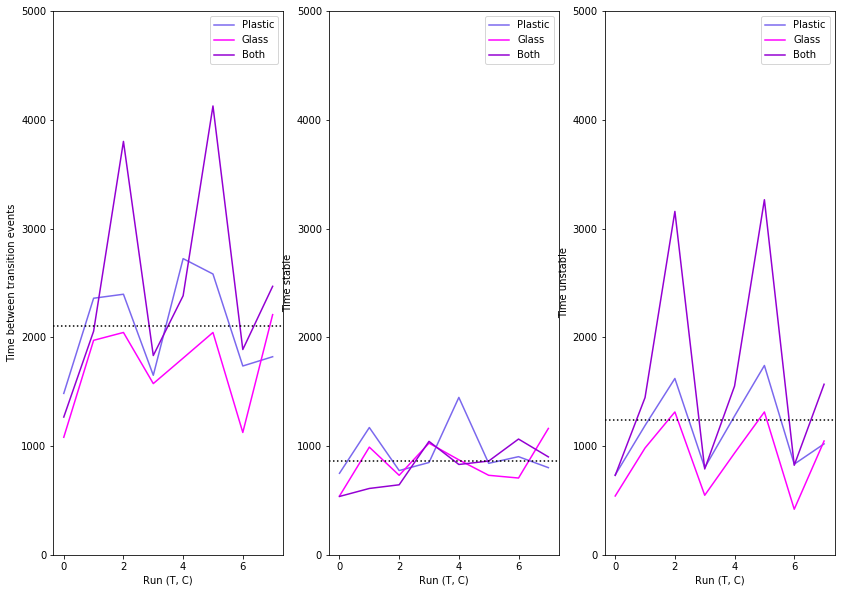

In [22]:
#split out the different measures - in terms of the time ins tate_stable / time in state total, etc
print(np.shape(reduced_times_from))
total_time = reduced_times_from[:,0]
stable_time= reduced_times_from[:,1]
unstable_time= reduced_times_from[:,2]
print(stable_time)
print(stable_time.T)
# for each time, separate the three axes
times = [total_time, stable_time, unstable_time]
timenames = ["Time between transition events", "Time stable", "Time unstable"]
fig, ax = plt.subplots(ncols = tlen, figsize = (14, 10))
for index, measure in enumerate(times):
    ax[index].set_prop_cycle(color=cols)
    ax[index].plot(measure)
    ax[index].set_ylabel(timenames[index])
    ax[index].set_xlabel("Run (T, C)")
    ax[index].set_ylim(0, 5000)
    ax[index].axhline(np.mean(measure), c = 'k', ls = ":")
    ax[index].legend(["Plastic", "Glass", "Both"])